In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
import sklearn.model_selection as ms

In [5]:
weather = pd.read_csv("weatherHistory.csv")

In [6]:
weather.dropna(inplace = True)
weather.drop('Formatted Date', axis=1, inplace=True)
weather.drop('Loud Cover', axis=1, inplace=True)

array([[<Axes: title={'center': 'Pressure (millibars)'}>]], dtype=object)

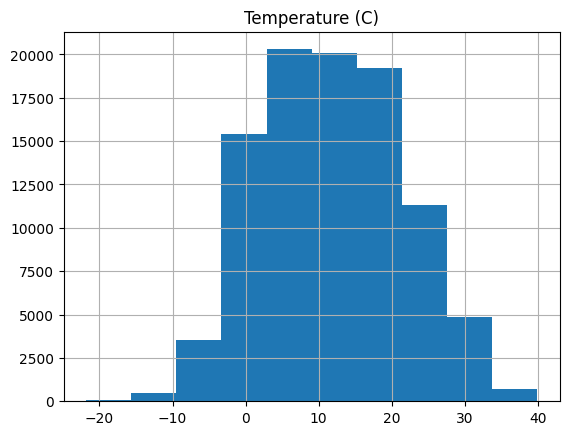

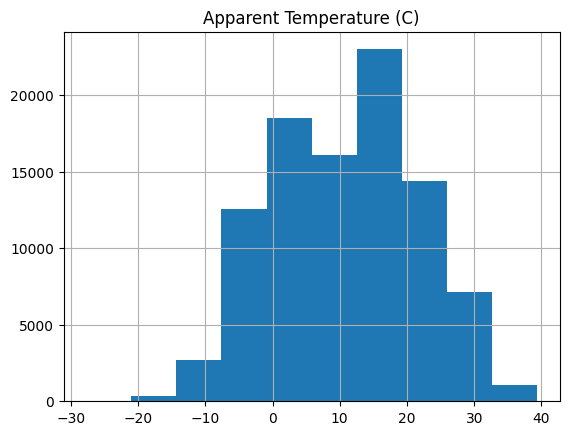

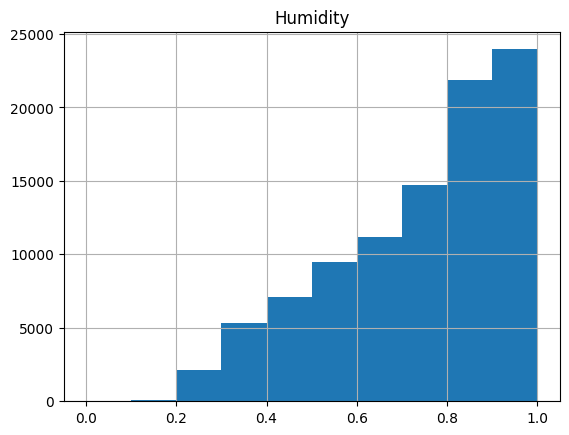

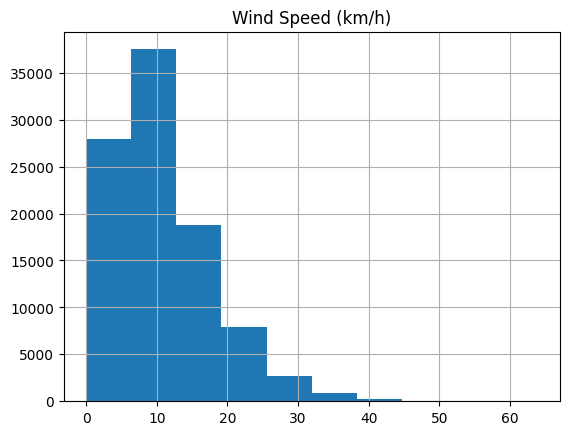

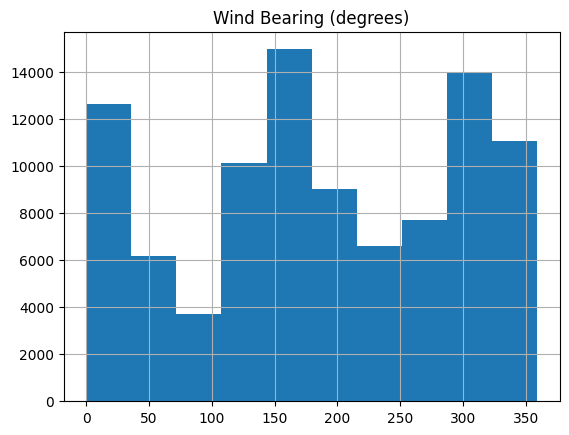

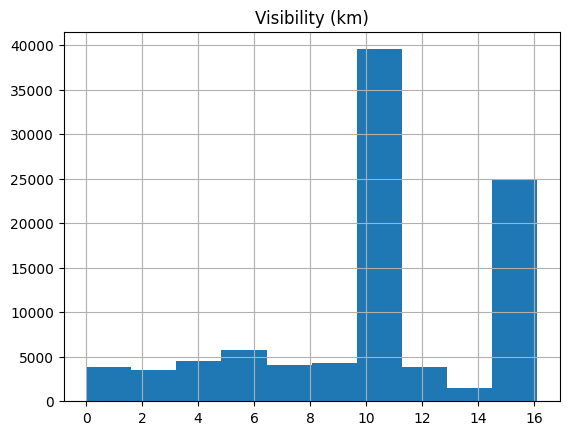

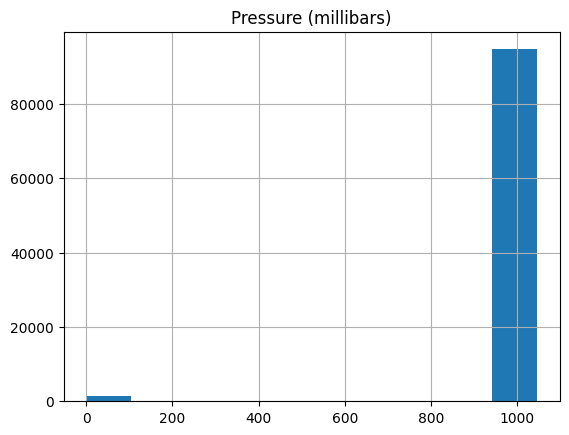

In [7]:
#weather.describe()
weather.hist('Temperature (C)')
weather.hist('Apparent Temperature (C)')
weather.hist('Humidity')
weather.hist('Wind Speed (km/h)')
weather.hist('Wind Bearing (degrees)')
weather.hist('Visibility (km)')
weather.hist('Pressure (millibars)')
#weather.info()

(array([10712.,     0.]),
 array([1., 2., 3.]),
 <BarContainer object of 2 artists>)

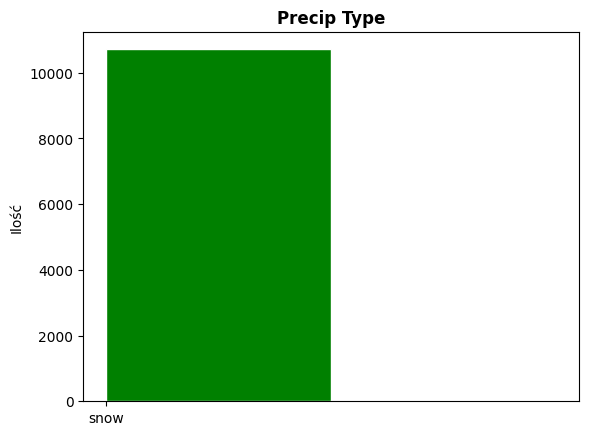

In [8]:
bins=np.arange(1, 4, 1)
colors = ['green']
plt.title('Precip Type',fontweight ="bold")
plt.ylabel('Ilość')
plt.hist(weather['Precip Type'], bins, color = colors, edgecolor='w')

In [10]:
weather.dropna(inplace = True)

for x in weather.index:
  if weather.loc[x, "Temperature (C)"] > 56.7:
    weather.dropna(x)

  if weather.loc[x, "Apparent Temperature (C)"] > 81:
    weather.dropna(x)

In [11]:
#zmiana typu danych kolumn Summary, Daily Summary i Precip Type
ser = weather["Daily Summary"].value_counts().index
pd.Series(ser,index=ser).to_csv('DailySummary.txt', header=False, index=False)
file1 = open('DailySummary.txt', 'r')
Lines = file1.readlines()

n = -1
for line in Lines:
  n+=1
  weather["Daily Summary"].replace({line.strip(): n}, inplace=True)

ser = weather["Summary"].value_counts().index
pd.Series(ser,index=ser).to_csv('Summary.txt', header=False, index=False)
file = open('Summary.txt', 'r')
Lines = file.readlines()

m = -1
for line in Lines:
  m+=1
  weather["Summary"].replace({line.strip(): m}, inplace=True)



weather["Precip Type"].replace({"rain":0}, inplace=True)
weather["Precip Type"].replace({"snow":1}, inplace=True)

#print(weather["Daily Summary"].value_counts().index)
#weather.info()

In [12]:
weather = weather.rename(columns={"Summary": "target"})

(array([7.6065e+04, 1.8408e+04, 9.0200e+02, 2.1600e+02, 9.9000e+01,
        1.1400e+02, 8.6000e+01, 2.4000e+01, 1.9000e+01, 3.0000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

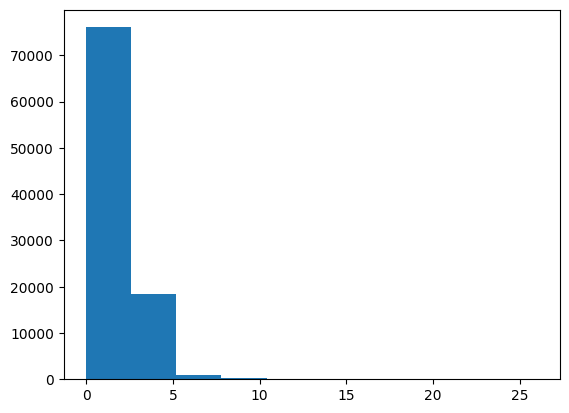

In [13]:
plt.hist(weather["target"])

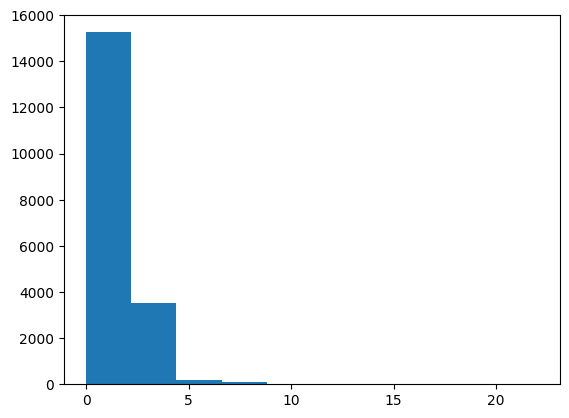

In [14]:
X = weather.drop("target",axis =1)
y = weather["target"]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42) #podzial na zbiory uczace i testowe

plt.hist(y_test)
plt.show()

In [ ]:
#y_test.value_counts()

"""model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(350, activation="relu"),  # numOfNeurons,activationFunction
    Dense(300, activation="relu"),
    Dense(250, activation="relu"),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    Dense(27, activation="softmax")
])"""

"""model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(700, activation="relu"),  # numOfNeurons,activationFunction
    Dense(600, activation="relu"),
    Dense(500, activation="relu"),
    Dense(400, activation="relu"),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    Dense(27, activation="softmax")
])"""

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(2000, activation="relu"),  # numOfNeurons,activationFunction
    Dense(1000, activation="relu"),
    Dense(27, activation="softmax")
])

#parametry sieci
model.compile(
    loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy", "sparse_categorical_crossentropy"])

model.summary() #podsumowanie modelu sieci

#rozpoczecie uczenia
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              20000     
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_2 (Dense)             (None, 27)                27027     
                                                                 
Total params: 2,048,027
Trainable params: 2,048,027
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2399/2399 [==============================] - 101s 42ms/step - loss: 3.4717 - accuracy: 0.4045 - sparse_categorical_crossentropy: 3.4717 - val_loss: 1.1897 - val_accuracy: 0.4702 - val_sparse_categorical_crossentropy: 1.1897
Epoch 2/100
2399/2399 [==============================] - 98s 41ms/step - l

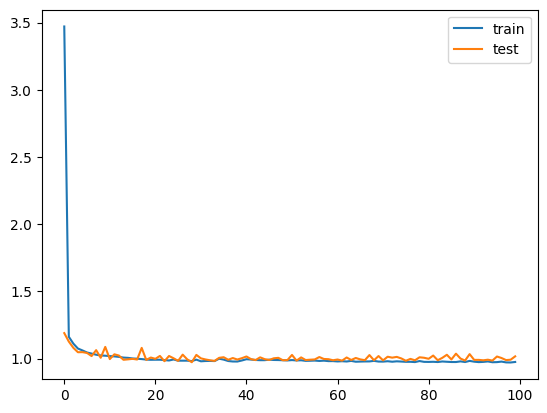

In [ ]:
plt.plot(history.history['sparse_categorical_crossentropy'], label = "train")
plt.plot(history.history['val_sparse_categorical_crossentropy'], label = "test")
plt.legend()
plt.show()

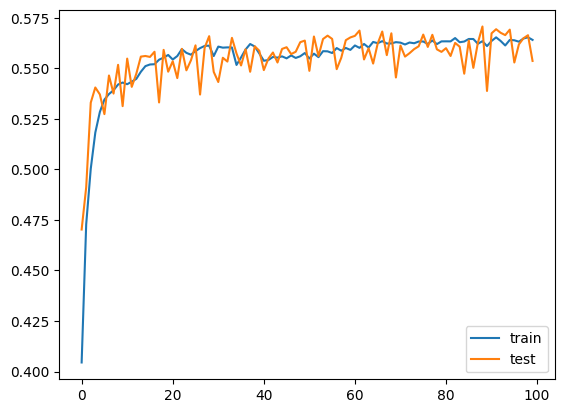

In [ ]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.show()